In [2]:
import numpy as np
import matplotlib.pyplot as plt

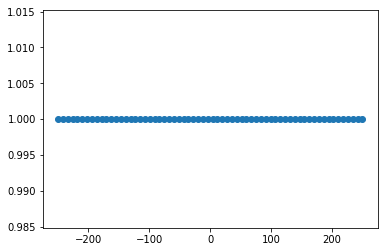

In [74]:
N = 64
max_pos = 250
Antenna_positions = 'Linear'

if Antenna_positions == 'Linear':
    pos = np.linspace(-max_pos,max_pos,N)
elif Antenna_positions == 'Random':
    pos = 2*max_pos*np.random.uniform(size=N)
elif Antenna_positions == 'Linear with Random':
    pos = np.linspace(-max_pos,max_pos,N)
    pos[0] = np.random.uniform(-max_pos,max_pos)
    pos[1] = np.random.uniform(-max_pos,max_pos)
    pos[2] = np.random.uniform(-max_pos,max_pos)
    
plt.scatter(pos, np.ones(64))
plt.show()

In [99]:
c = 3e8
N_BEAMS = 256
N_FREQ = 256
field_of_view_half_angle = 3.5
theta = np.linspace(-field_of_view_half_angle*np.pi/180.0, field_of_view_half_angle*np.pi/180.0, N_BEAMS)
freq = np.linspace(1.28,1.53, N_FREQ)


form_beams_with_freq = [0, 101,222, 255]
A = np.zeros((len(form_beams_with_freq), N_BEAMS, N), dtype=np.complex64)

for k, f in enumerate(form_beams_with_freq):
    wavelength = c/(freq[f]*1e9)
    for i in range(N_BEAMS):
        for j in range(N):
            A[k, i,j] = np.exp(-2.0j*np.pi*pos[j]*np.sin(theta[i])/wavelength)

In [103]:
eval_pts = 100000
angles = np.linspace(-np.pi/2, np.pi/2, eval_pts)
out = np.zeros((N_BEAMS, eval_pts))

for k, f in enumerate(form_beams_with_freq):
    print(k)
    wavelength = c/(freq[f]*1e9)
    for jj in range(len(angles)):
        signal = [np.exp(2*np.pi*1j*pos[i]*np.sin(angles[jj])/wavelength) for i in range(N)]
        out[:,jj] += np.real(np.dot(A[k,:,:], signal))

0
1
2
3


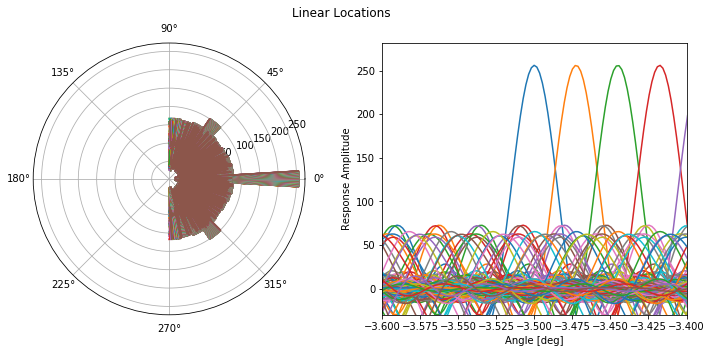

In [108]:
fig = plt.figure(figsize=(12,5))
fig.suptitle(Antenna_positions + " Locations")
ax = plt.subplot(121,projection='polar')
ax2 = plt.subplot(122)

for jj in range(256):#[0, 64, 128, 192, 255]:
    ax.plot(angles, out[jj])
    ax2.plot(angles*180/np.pi, out[jj])
    
ax2.axis([-3.6, -3.4, -30, 1.1*max(out[0])])
ax2.set_xlabel("Angle [deg]")
ax2.set_ylabel("Response Amplitude")

plt.show()

In [ ]:
fig = plt.figure(figsize= (8,4))
tr = 141
for k in range(len(form_beams_with_freq)):
    ax = plt.subplot(tr)
    tr+=1
    ax.imshow(np.real(A[k]))
    ax.set_title("Freq = {0:.4g}".format(freq[form_beams_with_freq[k]]))
plt.show()